<a href="https://colab.research.google.com/github/fff1316169257/Jiayi_FU-GIS/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade  mapclassify==2.5.0

In [ ]:
! pip install contextily

In [ ]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import contextily as cx


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()
import geopandas as gpd


import time, webbrowser, zipfile


from google.colab import data_table
data_table.enable_dataframe_formatter()

from geopandas.tools import geocode
#! pip install geocoder
from geopy.geocoders import Nominatim
#if you do a lot of geocoding:
#https://developers.google.com/maps/documentation/geocoding/overview

geolocator = Nominatim(user_agent='blah@gmail.com')

from google.colab import files

import folium as f
from folium.plugins import MarkerCluster, HeatMap

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install mapclassify
import mapclassify

In [ ]:
! wget -q -O  CO_CARTO.dbf 'https://doc.google.com/uc?export=download&id=1sn_2cJkI6kVd2ZqwC0IUvyEtYRJprT5x&export=download'
! wget -q -O  CO_CARTO.prj 'https://doc.google.com/uc?export=download&id=17vkpihMWmYFNul8ewnmP2GtWnJLS4brR&export=download'
! wget -q -O  CO_CARTO.shx 'https://doc.google.com/uc?export=download&id=1brZUDHcstbz9f0oHY0nGtZRmm54qxqSX&export=download'
! wget -q -O  CO_CARTO.shp 'https://doc.google.com/uc?export=download&id=1fG5KpRxaG_M8m4hfW9KUhzUZLtDRRbop&export=download'

USmap=gpd.read_file('CO_CARTO.shp')

In [ ]:
! wget -q -O  COVID-19_Cases_US.cpg 'https://doc.google.com/uc?export=download&id=1pOGtu9F_2Pt8E1My91mkyN6gMM6_7uBD&export=download'
! wget -q -O  COVID-19_Cases_US.dbf 'https://doc.google.com/uc?export=download&id=1jMACA42YT8L7-FBzABRNXds44214RWxN&export=download'
! wget -q -O  COVID-19_Cases_US.prj 'https://doc.google.com/uc?export=download&id=10aa6qIA0jUd-vlkdXArPf5ClGuWrtNpT&export=download'
! wget -q -O  COVID-19_Cases_US.shx 'https://doc.google.com/uc?export=download&id=1oYXIpRRKF7rFAYqNYZ1osMQ7KNbJI13Q&export=download'
! wget -q -O  COVID-19_Cases_US.shp 'https://doc.google.com/uc?export=download&id=1PK2L4msVU2plUZ2r71ovveY7t_Xn1U75&export=download'

Comap=gpd.read_file('COVID-19_Cases_US.shp')

<ipython-input-49-7bf72dcb9be2>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


<Axes: >

<Axes: >

[]

[]

Text(0.5, 1.0, 'COVID-19 in USA')

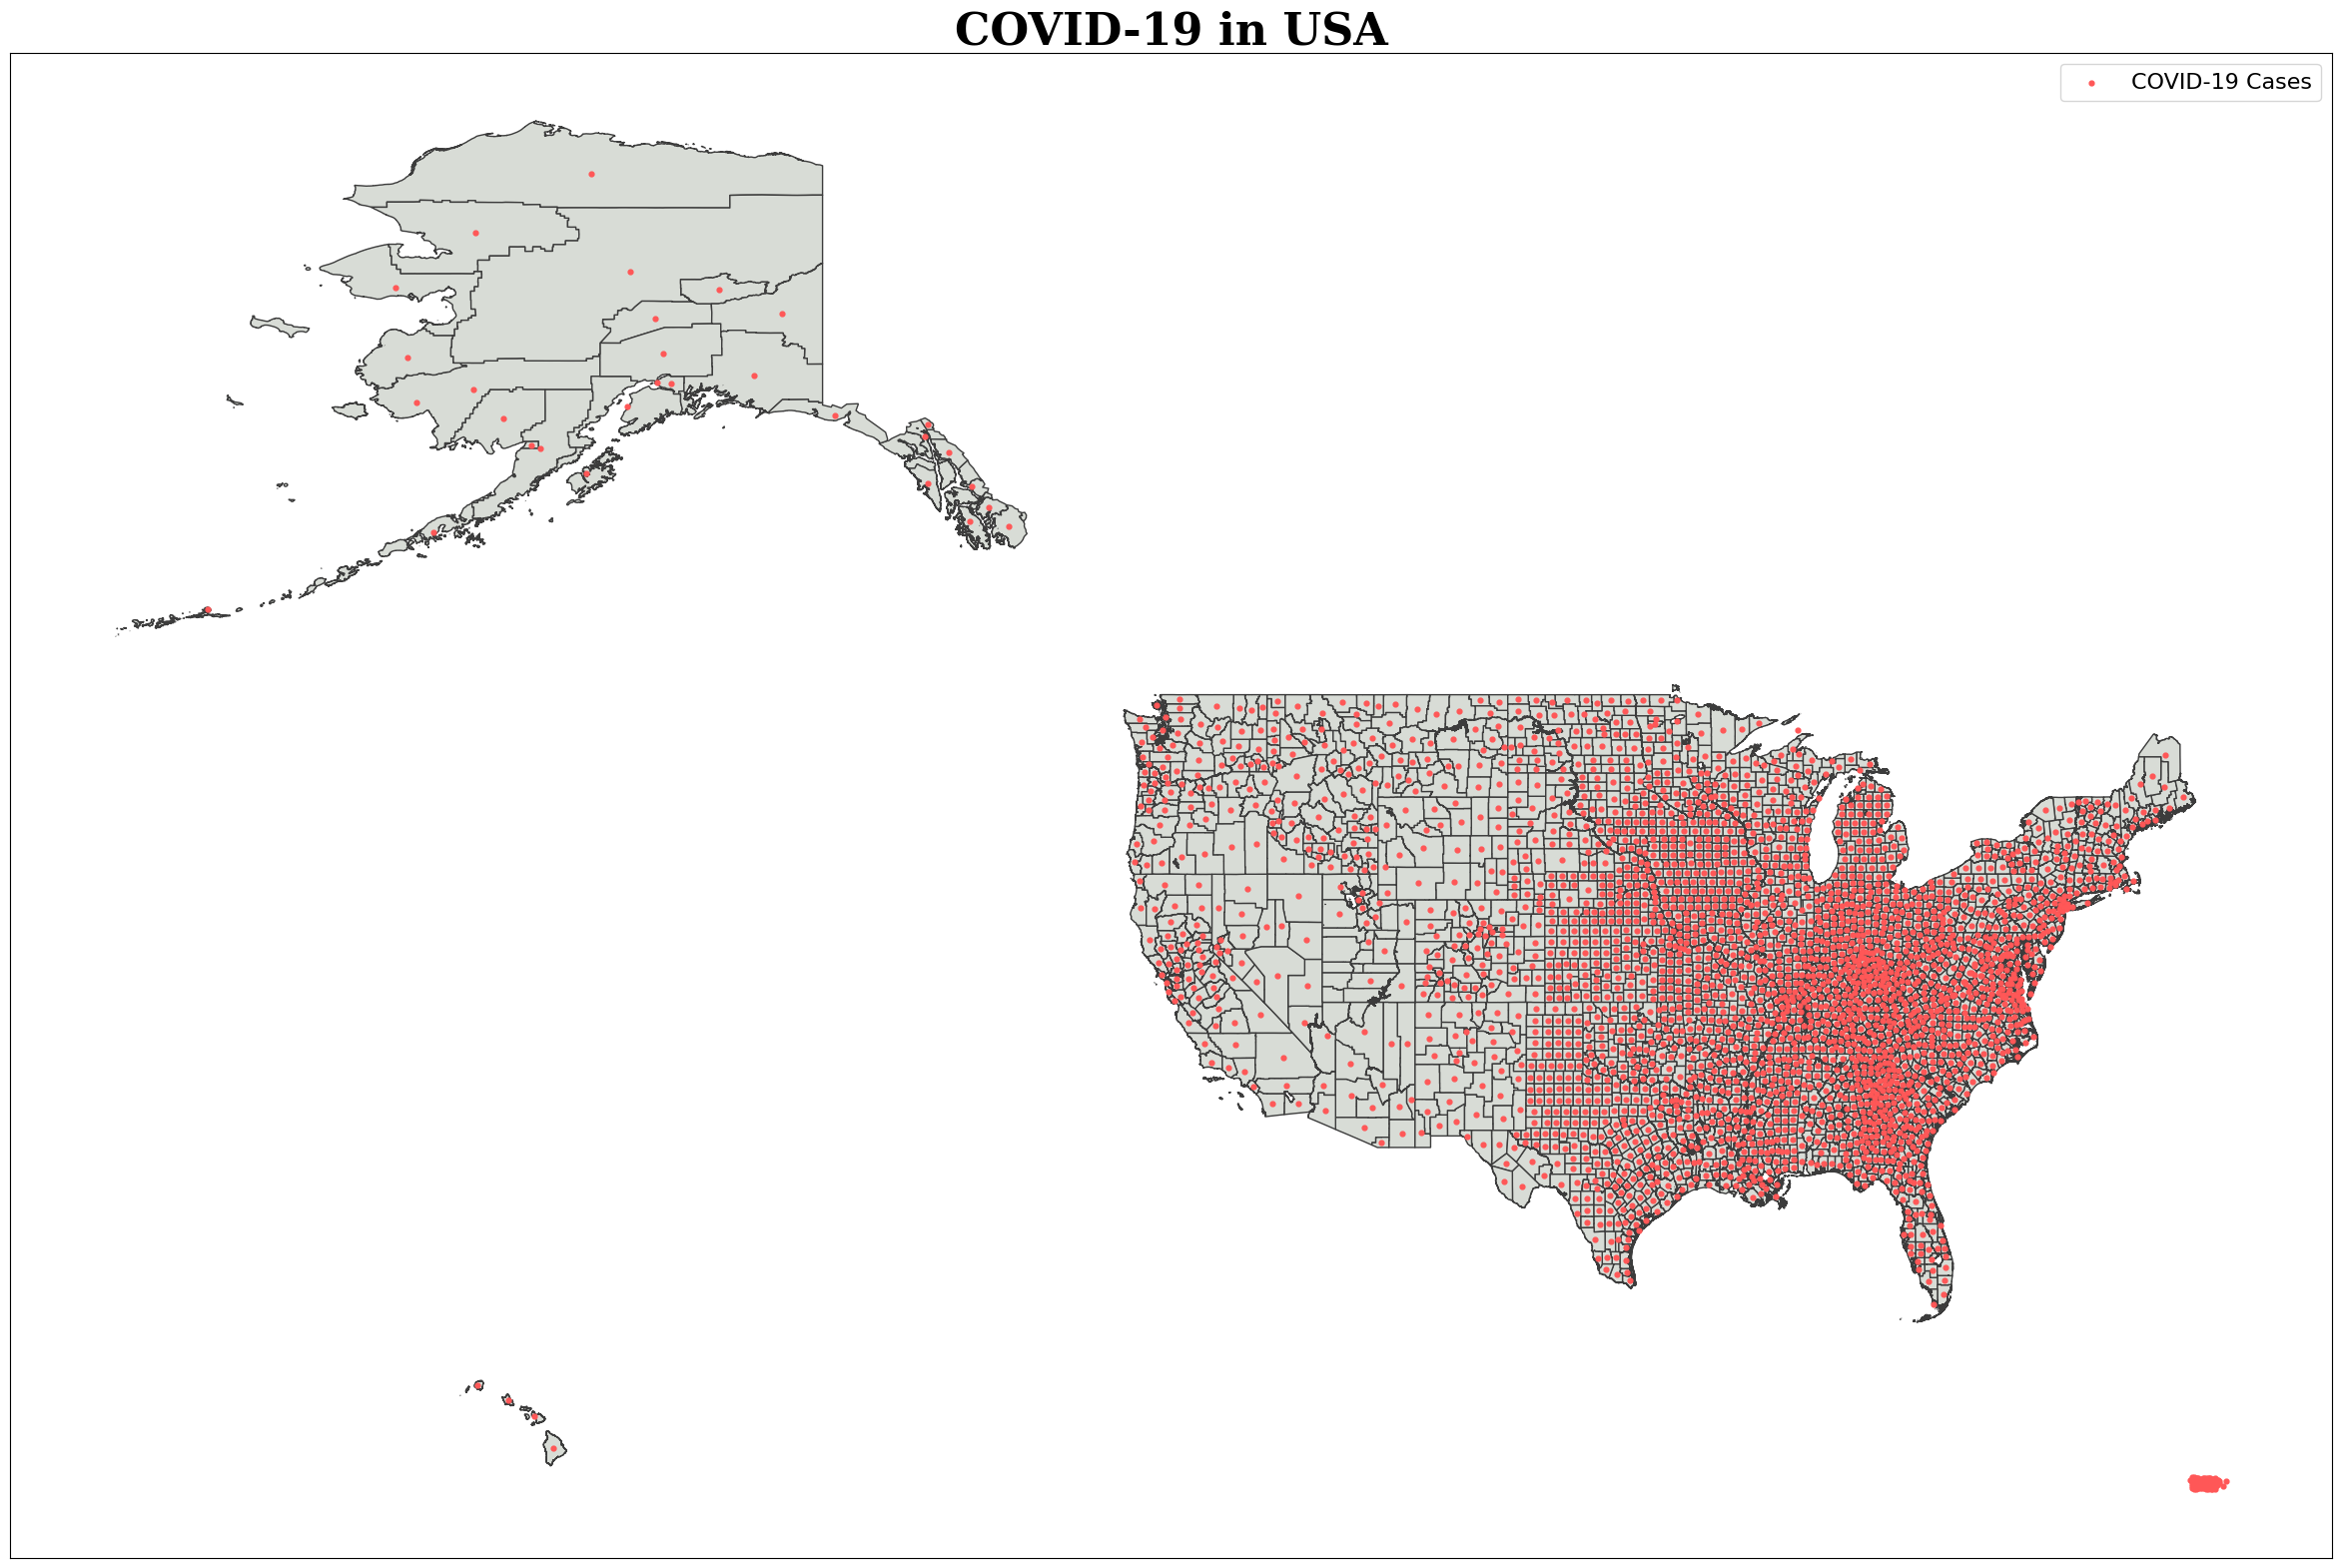

In [ ]:

USmap = gpd.read_file('CO_CARTO.shp')

fig, ax = plt.subplots(figsize=(30, 60))
plt.style.use('seaborn-colorblind')

USmap.plot(ax=ax, color='#d8dcd6', edgecolor='#3c3c3c', linewidth=1)

Comap.plot(ax=ax, marker='o', color='#ff5757', markersize=12, label='COVID-19 Cases')

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('COVID-19 in USA', fontsize=32, fontweight='bold', fontfamily='serif')

ax.legend(loc='upper right', fontsize=16)

plt.show()



## Part 1 ##
#### Some people are at higher risk of serious illness. Certain respiratory viruses, COVID-19, influenza, and respiratory syncytial virus infection viruses. That viral respiratory disease has affected people’s lives during COVID-19.(2022 - 2023) ####

In [ ]:
! wget -q -O  2023_Respiratory_Virus_Response_-_NSSP_Emergency_Department_Visits_-_COVID-19__Flu__RSV__Combined.csv 'https://doc.google.com/uc?export=download&id=1VV0-QMmYYObj5xcBm4h4nX21ePVHPskm&export=download'
data = pd.read_csv('2023_Respiratory_Virus_Response_-_NSSP_Emergency_Department_Visits_-_COVID-19__Flu__RSV__Combined.csv')

<Figure size 1500x800 with 0 Axes>

Text(0.5, 0, 'Week Ending')

Text(0, 0.5, 'Percent of Emergency Department Visits')

Text(0.5, 1.0, 'Percent of Emergency Department Visits by Pathogen Over Time')

(array([19297., 19358., 19417., 19478., 19539., 19601., 19662.]),
 [Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11')])

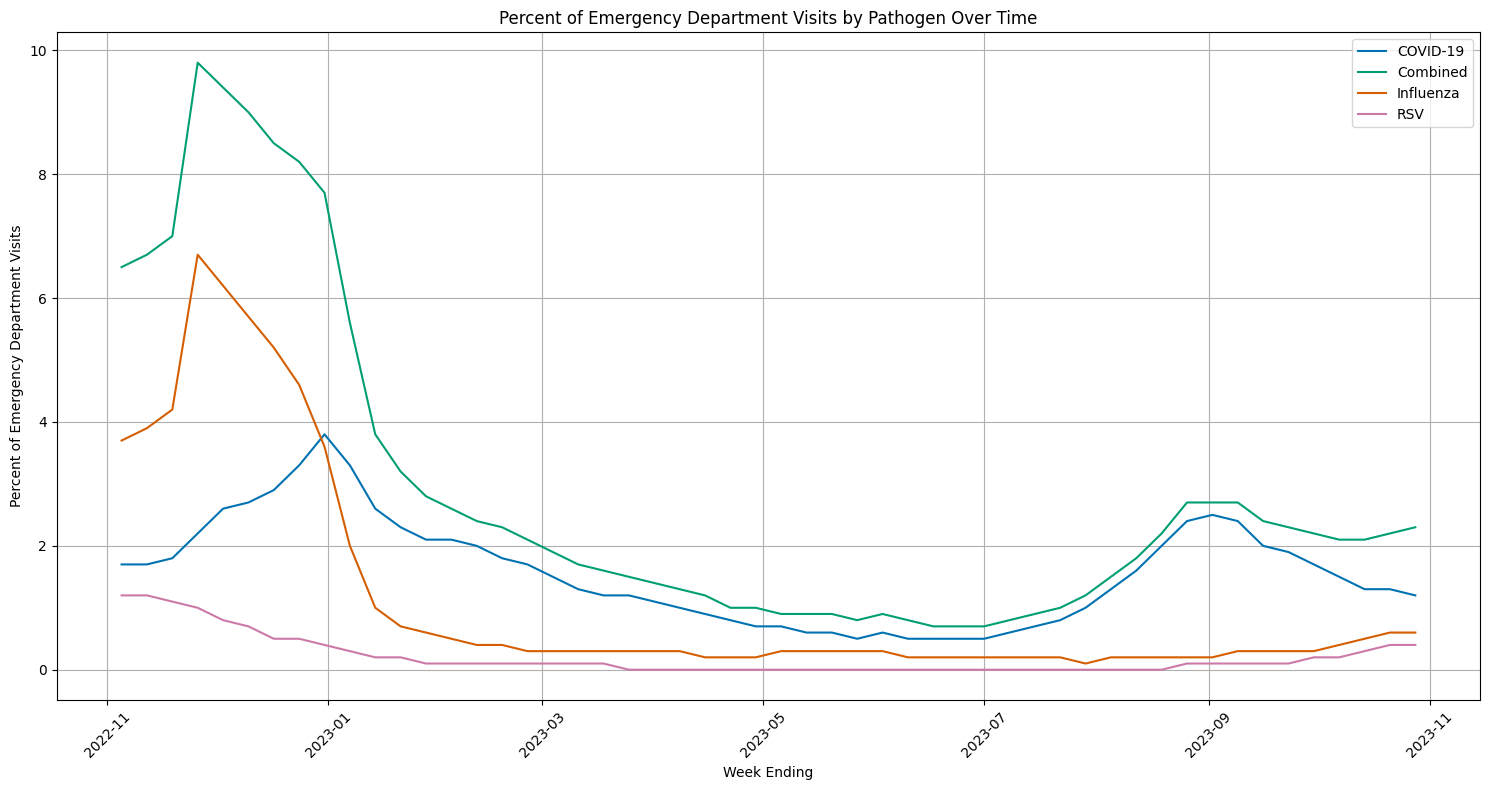

Dropdown(description='State:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', …

Dropdown(description='Year:', options=(2022, 2023), value=2022)

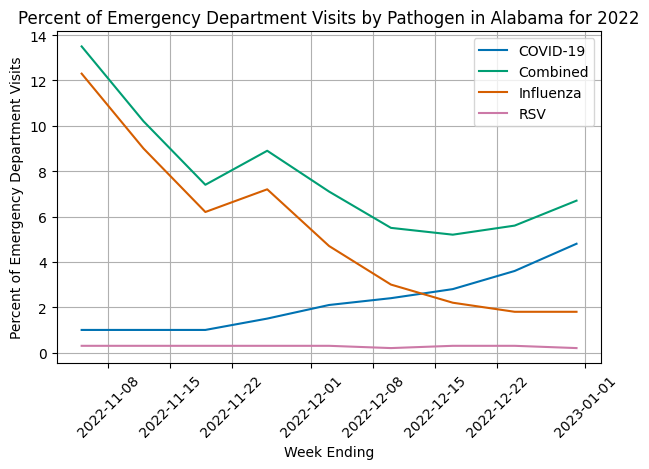

In [ ]:
national_data = data[data['geography'] == 'United States']

pivot_data = national_data.pivot(index='week_end', columns='pathogen', values='percent_visits')

pivot_data.index = pd.to_datetime(pivot_data.index)


pivot_data = pivot_data.sort_index()

plt.figure(figsize=(15, 8))

for pathogen in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[pathogen], label=pathogen)

plt.legend()
plt.xlabel('Week Ending')
plt.ylabel('Percent of Emergency Department Visits')
plt.title('Percent of Emergency Department Visits by Pathogen Over Time')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


data['year'] = pd.to_datetime(data['week_end']).dt.year


states = data['geography'].unique()
years = data['year'].unique()


state_dropdown = widgets.Dropdown(options=states, description='State:')
year_dropdown = widgets.Dropdown(options=years, description='Year:')


def update_plot(state, year):
    plt.clf()
    filtered_data = data[(data['geography'] == state) & (data['year'] == year)]

    pivot_data = filtered_data.pivot(index='week_end', columns='pathogen', values='percent_visits')
    pivot_data.index = pd.to_datetime(pivot_data.index)
    pivot_data = pivot_data.sort_index()

    for pathogen in pivot_data.columns:
        plt.plot(pivot_data.index, pivot_data[pathogen], label=pathogen)

    plt.legend()
    plt.xlabel('Week Ending')
    plt.ylabel('Percent of Emergency Department Visits')
    plt.title(f'Percent of Emergency Department Visits by Pathogen in {state} for {year}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

display(state_dropdown, year_dropdown)

def on_value_change(change):
    update_plot(state_dropdown.value, year_dropdown.value)

state_dropdown.observe(on_value_change, names='value')
year_dropdown.observe(on_value_change, names='value')

update_plot(state_dropdown.value, year_dropdown.value)

In [ ]:
! wget -q -O  States_shapefile.shx 'https://doc.google.com/uc?export=download&id=1-wA8gtvHuPmzzJJDxsHPfmtCitN_eekr&export=download'
! wget -q -O  States_shapefile.shp 'https://doc.google.com/uc?export=download&id=1KgQI-QPVklsFF-KimBLA8kehV8-3GUUT&export=download'
! wget -q -O  States_shapefile.prj 'https://doc.google.com/uc?export=download&id=1JjsEQX0AiL98xVhrVfvAH5KsOL_z6OwK&export=download'
! wget -q -O  States_shapefile.dbf 'https://doc.google.com/uc?export=download&id=1R2AN00hVGfAWa0IVwY7jNO9kmyPLddUI&export=download'
! wget -q -O  States_shapefile.cpg 'https://doc.google.com/uc?export=download&id=1s5c56qgDzmuvwYE65sv0SBH1EDbtrZvp&export=download'

USmap2=gpd.read_file('States_shapefile.shp')

In [ ]:
data1=data[['week_end','pathogen','geography','percent_visits']]
data1.rename(columns={'year': 'Year'}, inplace=True)
data1.rename(columns={'pathogen': 'Covid'}, inplace=True)
data1.rename(columns={'geography': 'State_Name'}, inplace=True)
data1.rename(columns={'percent_visits': 'percent_visits'}, inplace=True)
data1['State_Name']=data1['State_Name'].str.upper()


<ipython-input-62-4c039b16cf7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={'year': 'Year'}, inplace=True)
<ipython-input-62-4c039b16cf7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={'pathogen': 'Covid'}, inplace=True)
<ipython-input-62-4c039b16cf7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={'geography': 'State_Name'}, inplace=True)
<ipython-input-62-4c0

In [ ]:
us1 = pd.merge(USmap2, data1, on='State_Name',how='outer',indicator=True)
us1[['State_Name','Covid','percent_visits','_merge']]

State_Name      Covid  percent_visits      _merge
0           ALABAMA   COVID-19             1.0        both
1           ALABAMA  Influenza            12.3        both
2           ALABAMA        RSV             0.3        both
3           ALABAMA   Combined            13.5        both
4           ALABAMA   COVID-19             1.0        both
...             ...        ...             ...         ...
9983  UNITED STATES   Combined             2.2  right_only
9984  UNITED STATES   COVID-19             1.2  right_only
9985  UNITED STATES  Influenza             0.6  right_only
9986  UNITED STATES        RSV             0.4  right_only
9987  UNITED STATES   Combined             2.3  right_only

[9988 rows x 4 columns]

  State_Name     Covid  percent_visits _merge
0    ALABAMA  COVID-19             1.0   both
1    ALABAMA  COVID-19             1.0   both
2    ALABAMA  COVID-19             1.0   both
3    ALABAMA  COVID-19             1.5   both
4    ALABAMA  COVID-19             2.1   both


<Axes: >

[]

[]

Text(0.5, 1.0, '2022 percent_visits for Covid - 19')

Text(0.5, 0.1, 'Data from CDC')

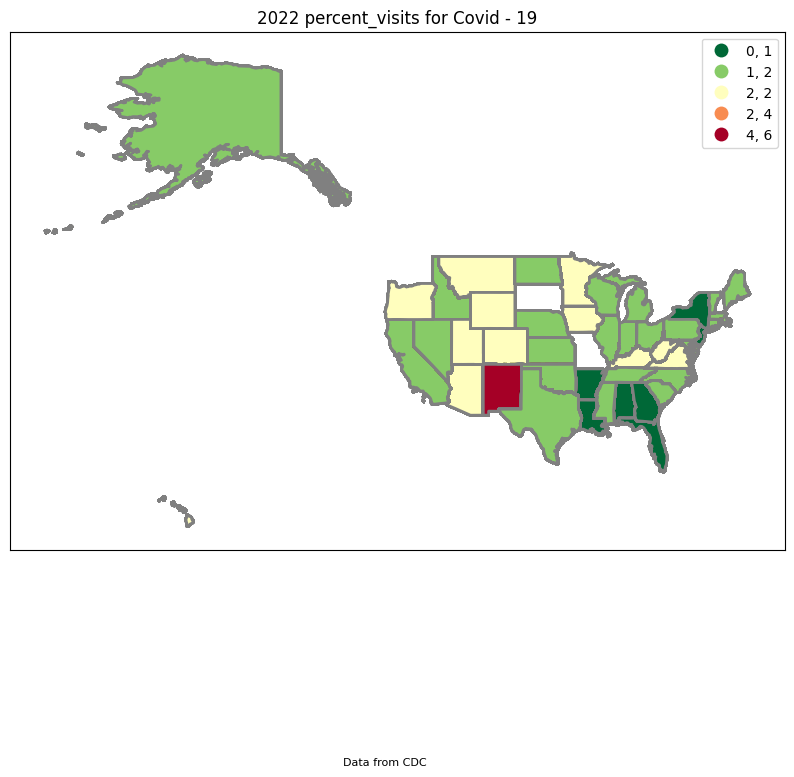

In [ ]:
data1_covid_only = data1[data1['Covid'] == 'COVID-19']

us1 = pd.merge(USmap2, data1_covid_only, on='State_Name', how='outer', indicator=True)

print(us1[['State_Name', 'Covid', 'percent_visits', '_merge']].head())

fig, ax = plt.subplots(figsize=(10, 12))

us1.plot(ax=ax, column='percent_visits', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=2,
         legend_kwds={"fmt": "{:,.0f}"})

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('2022 percent_visits for Covid - 19')

plt.figtext(0.5, 0.1, '''Data from CDC''', ha="center", fontsize=8)


plt.show()


In [ ]:
! wget -q -O  visitors-transit-covid.csv 'https://doc.google.com/uc?export=download&id=13Kt4N8rRWOTj9_PmnfW5vnhzPPU70nwd&export=download'
trans = pd.read_csv('visitors-transit-covid.csv')
! wget -q -O  visitors-transit-covid.csv 'https://doc.google.com/uc?export=download&id=13Kt4N8rRWOTj9_PmnfW5vnhzPPU70nwd&export=download'
trans = pd.read_csv('visitors-transit-covid.csv')
! wget -q -O  US_reporting_frequency.csv 'https://doc.google.com/uc?export=download&id=19TX8gjplvRB0utcItnxptjA_jHgEDDlO&export=download'
transit_data = pd.read_csv('US_reporting_frequency.csv')

<ipython-input-71-f56bb5e38568>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_usa['Day'] = pd.to_datetime(trans_usa['Day'])


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Transit Stations: How did the number of visitors change relative to before the pandemic')

Text(0.5, 0, 'Date')

Text(0, 0.5, '% Change from Baseline')

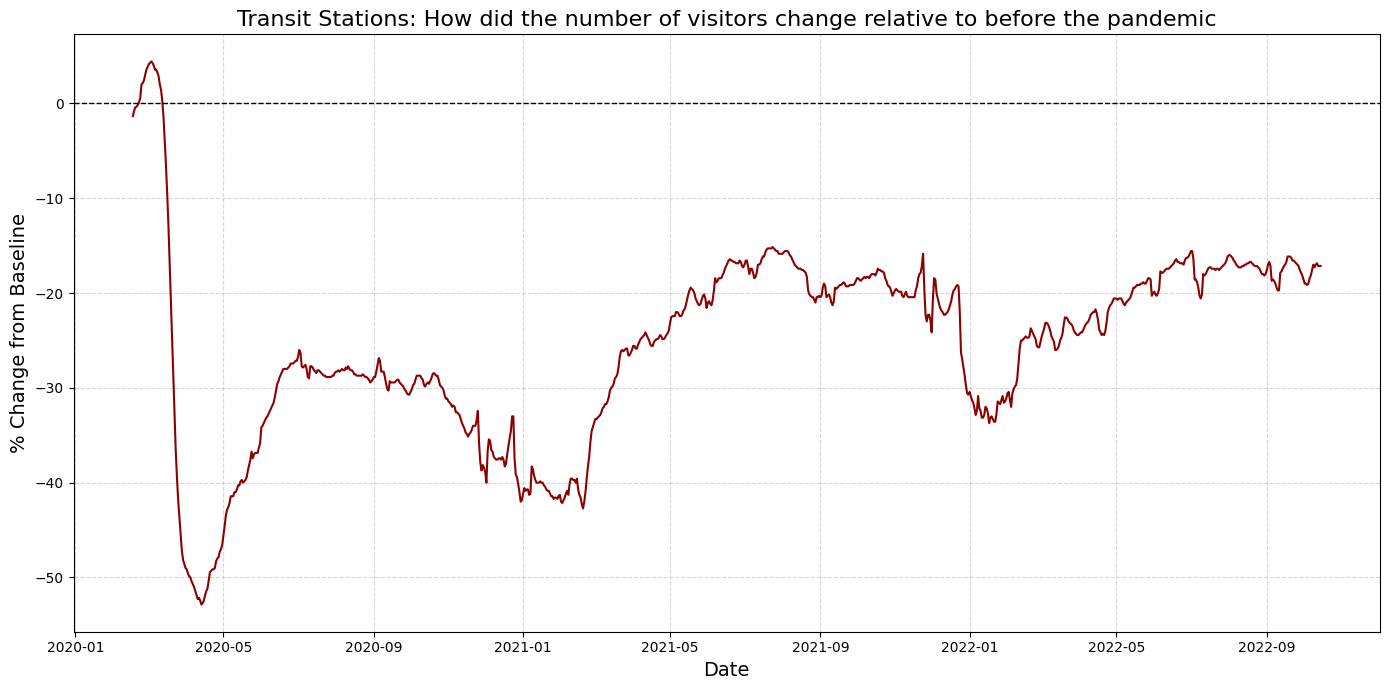

In [ ]:
trans_usa = trans[trans['Entity'] == 'United States']

trans_usa['Day'] = pd.to_datetime(trans_usa['Day'])

plt.figure(figsize=(14, 7))
plt.plot(trans_usa['Day'], trans_usa['transit_stations'], color='darkred', linewidth=1.5)
plt.title('Transit Stations: How did the number of visitors change relative to before the pandemic', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Change from Baseline', fontsize=14)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()


plt.savefig('path_to_save_figure.png')


plt.show()

In [ ]:
! wget -q -O  National_Transit_Map_Agencies.csv 'https://doc.google.com/uc?export=download&id=14EiMHmypgqcvtbxpF3HdD3tScYaNDPSP&export=download'
transit_data = pd.read_csv('National_Transit_Map_Agencies.csv')

In [ ]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[39.50, -98.35], zoom_start=4)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in transit_data.iterrows():
    folium.Marker([row['Y'], row['X']], popup=row['agency_name']).add_to(marker_cluster)


m

In [ ]:
! wget -q -O  Trips_by_Distance_20231114.csv 'https://doc.google.com/uc?export=download&id=1lI4eux1K16S_RNg8fOMvxj9i5DE8ap9T&export=download'


In [ ]:
Trips_data = pd.read_csv('Trips_by_Distance_20231114.csv')

In [ ]:
Trips_data.head(10)

Level        Date  State FIPS State Postal Code  County FIPS  \
0  National  2019/01/01         NaN               NaN          NaN   
1  National  2019/01/02         NaN               NaN          NaN   
2  National  2019/01/03         NaN               NaN          NaN   
3  National  2019/01/04         NaN               NaN          NaN   
4  National  2019/01/05         NaN               NaN          NaN   
5  National  2019/01/06         NaN               NaN          NaN   
6  National  2019/01/07         NaN               NaN          NaN   
7  National  2019/01/08         NaN               NaN          NaN   
8  National  2019/01/09         NaN               NaN          NaN   
9  National  2019/01/10         NaN               NaN          NaN   

  County Name  Population Staying at Home  Population Not Staying at Home  \
0         NaN                  77433867.0                     248733553.0   
1         NaN                  61305201.0                     264862219.0   
2         NaN                  63050480.0                     263116940.0   
3         NaN                  61803652.0                     264363768.0   
4         NaN                  64389745.0                     261777675.0   
5         NaN                  66498949.0                     259668471.0   
6         NaN                  62840591.0                     263326829.0   
7         NaN                  63064293.0                     263103127.0   
8         NaN                  62305155.0                     263862265.0   
9         NaN                  61355771.0                     264811649.0   

   Number of Trips  Number of Trips <1  ...  Number of Trips 5-10  \
0     8.977844e+08         241667151.0  ...           129670778.0   
1     1.139452e+09         291276735.0  ...           171637514.0   
2     1.162753e+09         296375014.0  ...           175775410.0   
3     1.181954e+09         293159631.0  ...           181324645.0   
4     1.180477e+09         295459014.0  ...           180941769.0   
5     1.073941e+09         268535036.0  ...           163231150.0   
6     1.144742e+09         301592063.0  ...           169846852.0   
7     1.141498e+09         299541016.0  ...           169468215.0   
8     1.135629e+09         291070223.0  ...           170647903.0   
9     1.161335e+09         297556678.0  ...           174998777.0   

   Number of Trips 10-25  Number of Trips 25-50  Number of Trips 50-100  \
0            116904343.0             40432062.0              15686639.0   
1            167412698.0             56148976.0              17739183.0   
2            172027487.0             57632422.0              18366626.0   
3            176144493.0             58761592.0              19315785.0   
4            165239790.0             54842134.0              19363939.0   
5            144091310.0             46931537.0              17418975.0   
6            165178406.0             55660657.0              17491604.0   
7            166322929.0             55968279.0              17369502.0   
8            166169173.0             55640198.0              17543261.0   
9            171169293.0             57136281.0              18087977.0   

   Number of Trips 100-250  Number of Trips 250-500  Number of Trips >=500  \
0                7525563.0                1806022.0              1728112.0   
1                7817044.0                1962301.0              1531219.0   
2                8124548.0                2038099.0              1567072.0   
3                8687318.0                2096065.0              1569185.0   
4                8490791.0                1991159.0              1438664.0   
5                8160971.0                1917898.0              1403061.0   
6                7584683.0                1815569.0              1428289.0   
7                7471402.0                1856802.0              1434182.0   
8                7709071.0                1923976.0              1498183.0   
9                7940

In [ ]:
Trips_data1=Trips_data[['State Postal Code','Population Not Staying at Home','Date']]
Trips_data1.rename(columns={'State Postal Code': 'State_Code'}, inplace=True)
Trips_data1.rename(columns={'Population Not Staying at Home': 'out'}, inplace=True)
Trips_data1.rename(columns={'Date': 'Date'}, inplace=True)
Trips_data1

<ipython-input-122-cf21b407a3ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trips_data1.rename(columns={'State Postal Code': 'State_Code'}, inplace=True)
<ipython-input-122-cf21b407a3ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trips_data1.rename(columns={'Population Not Staying at Home': 'out'}, inplace=True)
<ipython-input-122-cf21b407a3ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trips_data1.rename(columns={'Da

State_Code          out        Date
0              NaN  248733553.0  2019/01/01
1              NaN  264862219.0  2019/01/02
2              NaN  263116940.0  2019/01/03
3              NaN  264363768.0  2019/01/04
4              NaN  261777675.0  2019/01/05
...            ...          ...         ...
5650181         DE     770927.0  2023/11/04
5650182         ME    1069841.0  2023/11/04
5650183         OK    3152583.0  2023/11/04
5650184         WI    4673280.0  2023/11/04
5650185         WV    1409192.0  2023/11/04

[5650186 rows x 3 columns]

In [ ]:
Trips_data1['State_Code'] = Trips_data1['State_Code'].astype(str).str.upper()

<ipython-input-116-38f6360e6455>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trips_data1['State_Code'] = Trips_data1['State_Code'].astype(str).str.upper()


In [ ]:
us1.State_Code

0        AL
1        AL
2        AL
3        AL
4        AL
       ... 
2495    NaN
2496    NaN
2497    NaN
2498    NaN
2499    NaN
Name: State_Code, Length: 2500, dtype: object

In [ ]:
us1 = pd.merge(USmap2, Trips_data1, on='State_Code',how='outer',indicator=True)
us1[['State_Code','Date','out','_merge']]

State_Code        Date          out      _merge
0               AL  2019/01/01    3844356.0        both
1               AL  2019/01/02    4067659.0        both
2               AL  2019/01/03    4042510.0        both
3               AL  2019/01/04    4061987.0        both
4               AL  2019/01/05    4020196.0        both
...            ...         ...          ...         ...
5650181        NaN  2023/10/31  257876794.0  right_only
5650182        NaN  2023/11/01  258534362.0  right_only
5650183        NaN  2023/11/02  259897823.0  right_only
5650184        NaN  2023/11/03  260392462.0  right_only
5650185        NaN  2023/11/04  257245694.0  right_only

[5650186 rows x 4 columns]

<Axes: >

Text(0.5, 1.0, 'USA travel Values for 2022')

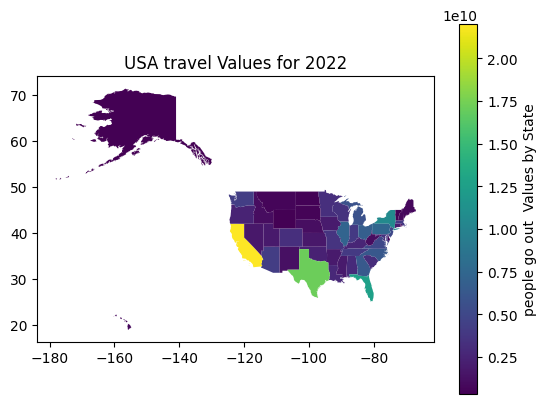

In [ ]:
us1['Year'] = pd.to_datetime(us1['Date']).dt.year


us1_filtered = us1[us1['Year'].isin([2022])]


us1_grouped = us1_filtered.groupby(['State_Code', 'Year'])['out'].sum().reset_index()

map_data = pd.merge(USmap2, us1_grouped, on='State_Code', how='left')

gdf = gpd.GeoDataFrame(map_data)


fig, ax = plt.subplots(1, 1)
gdf.plot(column='out', ax=ax, legend=True,
         legend_kwds={'label': "people go out  Values by State"},
         cmap='viridis')

plt.title('USA travel Values for 2022')
plt.show()

us1['Year'] = pd.to_datetime(us1['Date']).dt.year


us1_filtered = us1[us1['Year'].isin([2021, 2022, 2023])]

us1_grouped = us1_filtered.groupby(['State_Code', 'Year'])['out'].sum().reset_index()


fig = px.choropleth(us1_grouped,
                    locations='State_Code',
                    color='out',
                    hover_name='State_Code',
                    animation_frame='Year',
                    locationmode='USA-states',
                    scope="usa",
                    color_continuous_scale='Viridis')


fig.update_layout(
    title_text='Number of People Going Outside by State and Year',
    geo=dict(
        lakecolor='rgb(255, 255, 255)'),
    )


fig.show()

## Part- 2 ##

In [ ]:
! wget -q -O  COVID-19_Vaccine_Confidence.xlsx 'https://doc.google.com/uc?export=download&id=1z-aYe6m1PhcsUSdm0GfakqQTPDFLacZA&export=download'

ASD=pd.read_excel('COVID-19_Vaccine_Confidence.xlsx')
! wget -q -O  Vaccine_bergen.xlsx 'https://doc.google.com/uc?export=download&id=1WQQZvDWQSch6Mi4s-2E_PTj4nfnxIuCS&export=download'

VB=pd.read_excel('Vaccine_bergen.xlsx')

! wget -q -O  covid_confirmed_usafacts.xls 'https://doc.google.com/uc?export=download&id=1Nuk2PUwywb35LOK1iRELD5mRMRPJWUgK&export=download'
NJconf=pd.read_excel('covid_confirmed_usafacts.xls')

In [ ]:
ASD1=ASD[['Unnamed: 2' ,'Unnamed: 10' , 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 8', 'Unnamed: 7','Unnamed: 9','Unnamed: 12']]
ASD1.rename(columns={'Unnamed: 2': 'Age Range'}, inplace=True)
ASD1.rename(columns={'Unnamed: 10': 'Estimate (%)'}, inplace=True)
ASD1.rename(columns={'Unnamed: 4': 'Group Category'}, inplace=True)
ASD1.rename(columns={'Unnamed: 8': 'Year'}, inplace=True)
ASD1.rename(columns={'Unnamed: 7': 'Time Period'}, inplace=True)
ASD1.rename(columns={'Unnamed: 5': 'Indicator Name'}, inplace=True)
ASD1.rename(columns={'Unnamed: 4': 'Group Category'}, inplace=True)
ASD1.rename(columns={'Unnamed: 9': 'Time Type'}, inplace=True)
ASD1.rename(columns={'Unnamed: 12': 'Sample Size'}, inplace=True)
ASD1

<ipython-input-84-613ec26c982a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASD1.rename(columns={'Unnamed: 2': 'Age Range'}, inplace=True)
<ipython-input-84-613ec26c982a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASD1.rename(columns={'Unnamed: 10': 'Estimate (%)'}, inplace=True)
<ipython-input-84-613ec26c982a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASD1.rename(columns={'Unnamed: 4': 'Group Category'}, inplace=True

Age Range  Estimate (%)       Group Category  \
0       Age Range  Estimate (%)       Group Category   
1     12-17 years          32.4                Rural   
2     12-17 years            14        Below poverty   
3     12-17 years            22  White, non-Hispanic   
4     12-17 years          20.8               Female   
...           ...           ...                  ...   
8605   5-11 years          50.6                 Male   
8606   5-11 years          26.5         Any Medicaid   
8607   5-11 years          22.4        Below poverty   
8608   5-11 years          33.3               Female   
8609   5-11 years          48.1       Unknown income   

                                         Indicator Name  Year  \
0                                        Indicator Name  Year   
1     Bivalent vaccination and intent 4 level groupi...  2023   
2     Bivalent vaccination and intent 4 level groupi...  2023   
3     Bivalent vaccination and intent 4 level groupi...  2023   
4     Bivalent vaccination and intent 4 level groupi...  2023   
...                                                 ...   ...   
8605            Vaccination and intent 4 level grouping  2023   
8606            Vaccination and intent 4 level grouping  2023   
8607            Vaccination and intent 4 level grouping  2023   
8608            Vaccination and intent 4 level grouping  2023   
8609            Vaccination and intent 4 level grouping  2023   

           Time Period  Time Type  Sample Size  
0          Time Period  Time Type  Sample Size  
1     May 28 - June 30    Monthly          232  
2     May 28 - June 30    Monthly          187  
3     May 28 - June 30    Monthly          970  
4     May 28 - June 30    Monthly          964  
...                ...        ...          ...  
8605  May 28 - June 30    Monthly         2965  
8606  May 28 - June 30    Monthly         1416  
8607  May 28 - June 30    Monthly          567  
8608  May 28 - June 30    Monthly         2841  
8609  May 28 - June 30    Monthly         1082  

[8610 rows x 8 columns]

Text(0.0, 5744.5, '5744.00')

Text(1.0, 6552.5, '6552.00')

Text(0, 0.5, 'Sum of  Sample Size')

Text(0.5, 0, 'Age Range')

(array([0, 1]), [Text(0, 0, '12-17 years'), Text(1, 0, '6 months-4 years')])

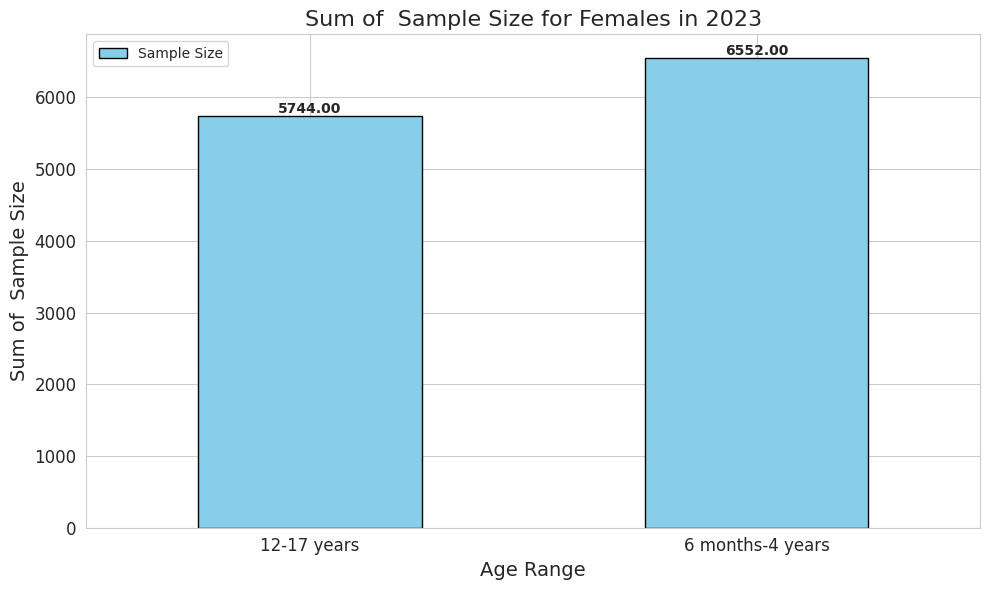

In [ ]:

import seaborn as sns

sns.set_style("whitegrid")

# Filter rows as per the criteria
filtered_rows = ASD1[
    (ASD1['Group Category'] == 'Female') &
    (ASD1['Year'] == 2023) &
    (ASD1['Time Period'] == 'May 28 - June 30') &
    (ASD1['Indicator Name'] == 'Vaccination and intent 4 level grouping') &
    ((ASD1['Age Range'] == '6 months-4 years') | (ASD1['Age Range'] == '12-17 years'))
]

# Summing up estimates and sample sizes
sum_data = filtered_rows.groupby('Age Range').agg({'Estimate (%)': 'sum', 'Sample Size': 'sum'}).reset_index()

colors = ['skyblue', 'lightpink']
ax = sum_data.plot(kind='bar', x='Age Range', y=['Sample Size'],
                   title='Sum of  Sample Size for Females in 2023', color=colors,
                   edgecolor='black', figsize=(10, 6), fontsize=12)

# Adding data labels on the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5,
            "{:.2f}".format(i.get_height()), ha='center', va='bottom', fontweight='bold')

ax.set_ylabel('Sum of  Sample Size', fontsize=14)
ax.set_xlabel('Age Range', fontsize=14)
ax.title.set_size(16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Text(0.0, 5900.5, '5900.00')

Text(1.0, 7048.5, '7048.00')

Text(0, 0.5, 'Sum of  Sample Size')

Text(0.5, 0, 'Age Range')

(array([0, 1]), [Text(0, 0, '12-17 years'), Text(1, 0, '6 months-4 years')])

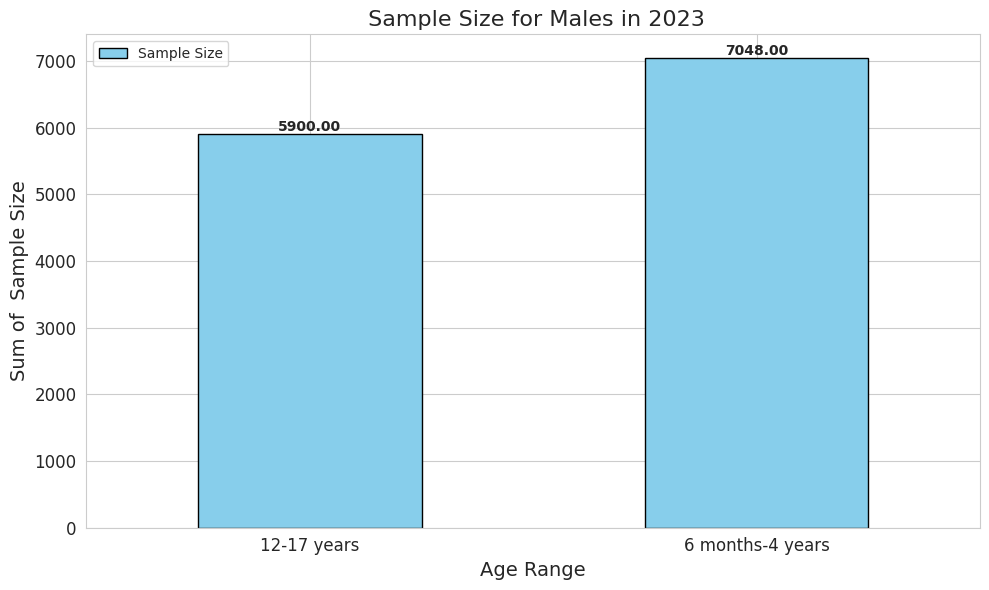

In [ ]:

sns.set_style("whitegrid")

# Filter rows as per the criteria
filtered_rows = ASD1[
    (ASD1['Group Category'] == 'Male') &
    (ASD1['Year'] == 2023) &
    (ASD1['Time Period'] == 'May 28 - June 30') &
    (ASD1['Indicator Name'] == 'Vaccination and intent 4 level grouping') &
    ((ASD1['Age Range'] == '6 months-4 years') | (ASD1['Age Range'] == '12-17 years'))
]

# Summing up estimates and sample sizes
sum_data = filtered_rows.groupby('Age Range').agg({'Estimate (%)': 'sum', 'Sample Size': 'sum'}).reset_index()

colors = ['skyblue', 'lightpink']
ax = sum_data.plot(kind='bar', x='Age Range', y=['Sample Size'],
                   title=' Sample Size for Males in 2023', color=colors,
                   edgecolor='black', figsize=(10, 6), fontsize=12)

# Adding data labels on the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5,
            "{:.2f}".format(i.get_height()), ha='center', va='bottom', fontweight='bold')

ax.set_ylabel('Sum of  Sample Size', fontsize=14)
ax.set_xlabel('Age Range', fontsize=14)
ax.title.set_size(16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
! wget -q -O  County_Boundaries_of_NJ.dbf 'https://doc.google.com/uc?export=download&id=1QBdMm0ZPs35PYhY7uY3jOZLCjnL9TkvK&export=download'
! wget -q -O  County_Boundaries_of_NJ.prj 'https://doc.google.com/uc?export=download&id=1-2ivTffuG8EnQwkqWYeviqYbD5KDtvwY&export=download'
! wget -q -O  County_Boundaries_of_NJ.shx 'https://doc.google.com/uc?export=download&id=12hIBW7Vwg8NiM--_yURCcwzqrPAYNmSG&export=download'
! wget -q -O  County_Boundaries_of_NJ.shp 'https://doc.google.com/uc?export=download&id=1JaWEpG4vcIZEe2IY-mHd1U5IqrojmJT7&export=download'
! wget -q -O  County_Boundaries_of_NJ.cpg 'https://doc.google.com/uc?export=download&id=1cOBA_aqsX_h8PuYkS5-3HyQHR0Mnfdt_&export=download'

njC=gpd.read_file('County_Boundaries_of_NJ.shp')

In [ ]:
! wget -q -O  Vaccine_bergen.xlsx 'https://doc.google.com/uc?export=download&id=1WQQZvDWQSch6Mi4s-2E_PTj4nfnxIuCS&export=download'

VB=pd.read_excel('Vaccine_bergen.xlsx')

In [ ]:
VB1=VB[['Unnamed: 0' ,'Admin w/ Supression']]
VB1.rename(columns={'Unnamed: 0': 'type_name'}, inplace=True)
VB1.rename(columns={'Admin w/ Supression': 'quantity'}, inplace=True)

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Bergen County Highlighted')

([<matplotlib.patches.Wedge at 0x7d276af69f00>,
 [Text(-0.9716973657342485, 0.7041336729805799, 'Johnson & Johnson'),
  Text(-1.1108591507993277, -0.4538633572843227, 'Moderna'),
  Text(-0.2837059091882605, -1.1659806846992202, 'Novavax'),
  Text(1.1401466819916206, 0.3742533146726936, 'Pfizer')],
 [Text(-0.5668234633449782, 0.41074464257200494, '50363\n'),
  Text(-0.6480011712996078, -0.26475362508252154, '669007\n'),
  Text(-0.16549511369315192, -0.6801553994078785, '251\n'),
  Text(0.665085564495112, 0.21831443355907126, '1507068\n')])

Text(0.5, 1.0, 'Pie Chart of Vaccine Dosages (Bergen County)')

(-1.2019503782790866,
 1.2043888004652794,
 -1.1739035363442714,
 1.1361898633004406)

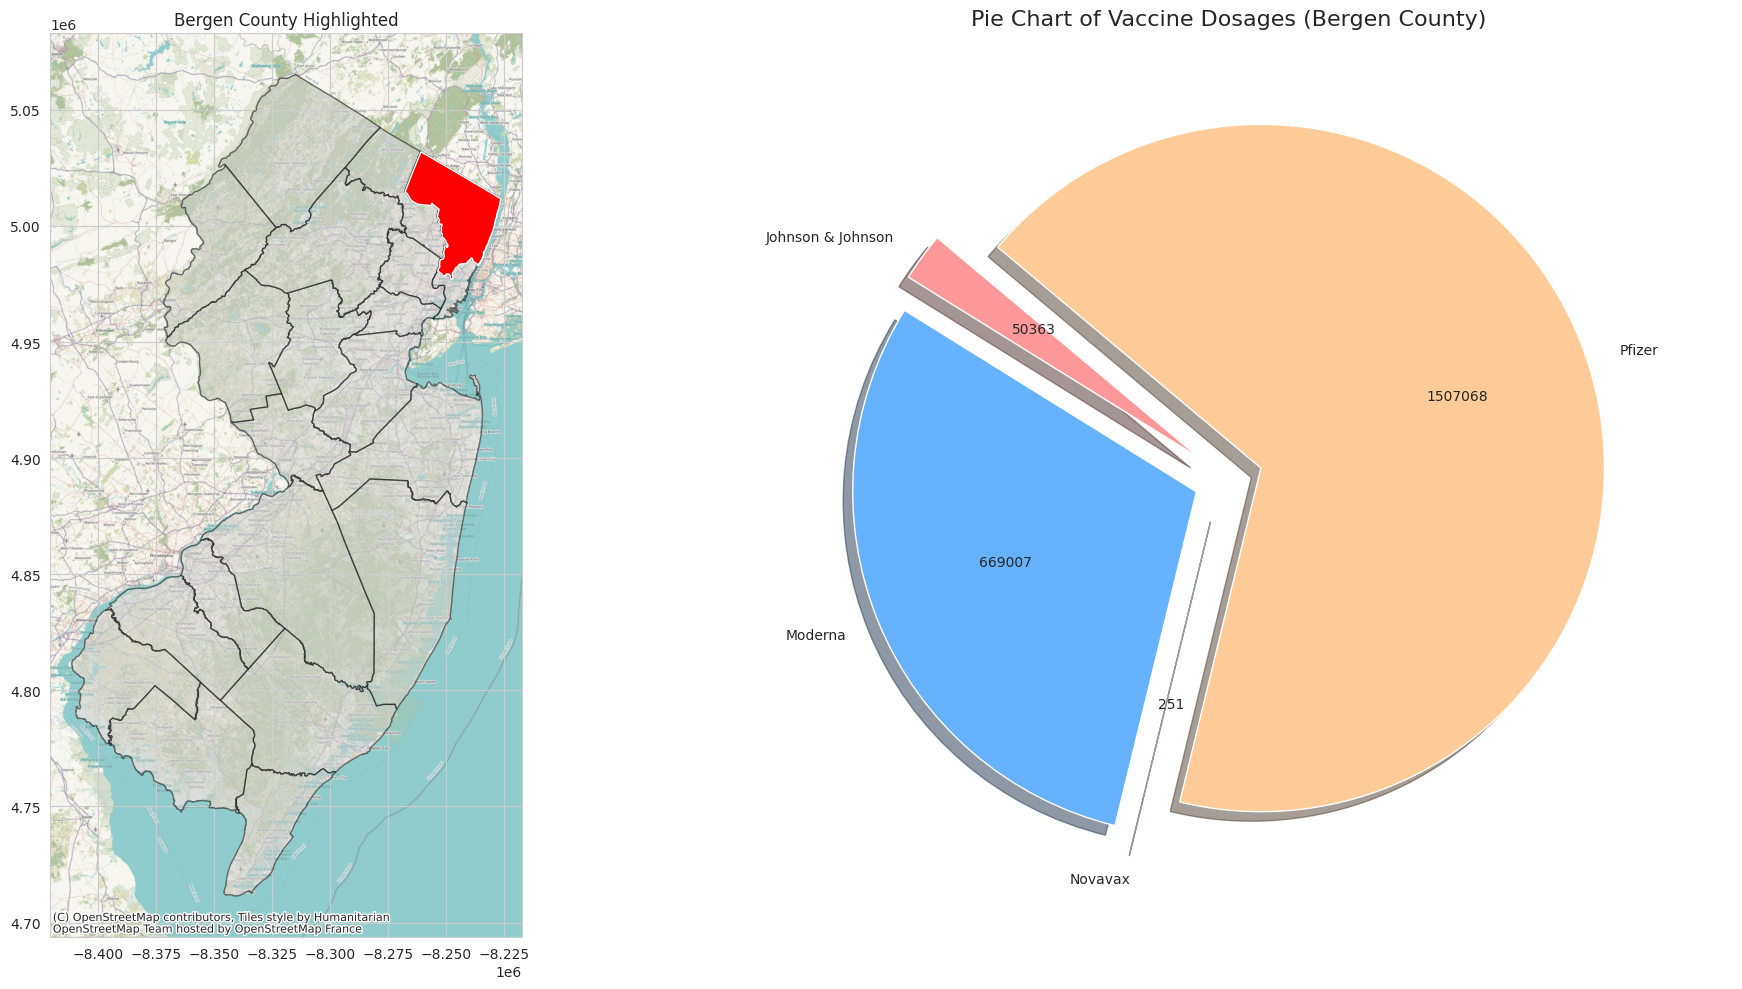

In [ ]:
njC = njC.to_crs(epsg=3857)

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot Bergen County on the first subplot
njC.plot(ax=ax1, alpha=0.5, edgecolor='k', facecolor="lightgray")
bergen = njC[njC['COUNTY'] == 'BERGEN']
bergen.plot(ax=ax1, color='red')
cx.add_basemap(ax1, zoom=10)
ax1.set_title("Bergen County Highlighted")

# Filter and prepare data for the pie chart
VB1_filtered = VB1[VB1['type_name'].isin(['Johnson & Johnson', 'Moderna', 'Novavax', 'Pfizer'])]
labels = VB1_filtered['type_name']
sizes = VB1_filtered['quantity']

# Pie chart colors and explode settings
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
explode = (0.1, 0.1, 0.1, 0.1)

# Function to format pie chart labels
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.0f}\n".format(absolute)

# Plot the pie chart on the second subplot
ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes),
        startangle=140, shadow=True)
ax2.set_title('Pie Chart of Vaccine Dosages (Bergen County)', fontdict={'fontsize': '16', 'fontweight': 'medium'})
ax2.axis('equal')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<ipython-input-133-4a8814ba3326>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations1.rename(columns={'united_states_covid19_hospitalizations_by_county': 'County'}, inplace=True)
<ipython-input-133-4a8814ba3326>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations1.rename(columns={'Unnamed: 1': 'State'}, inplace=True)
<ipython-input-133-4a8814ba3326>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitaliz

<Figure size 1500x700 with 0 Axes>

Text(0, 0.5, 'New COVID-19 hospital admissions per 100,000 population past week (total)')

Text(0.5, 0, 'County in NJ')

Text(0.5, 1.0, 'New COVID-19 Hospital Admissions by County in NJ')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Atlantic County'),
  Text(1, 0, 'Bergen County'),
  Text(2, 0, 'Burlington County'),
  Text(3, 0, 'Camden County'),
  Text(4, 0, 'Cape May County'),
  Text(5, 0, 'Cumberland County'),
  Text(6, 0, 'Essex County'),
  Text(7, 0, 'Gloucester County'),
  Text(8, 0, 'Hudson County'),
  Text(9, 0, 'Hunterdon County'),
  Text(10, 0, 'Mercer County'),
  Text(11, 0, 'Middlesex County'),
  Text(12, 0, 'Monmouth County'),
  Text(13, 0, 'Morris County'),
  Text(14, 0, 'Ocean County'),
  Text(15, 0, 'Passaic County'),
  Text(16, 0, 'Salem County'),
  Text(17, 0, 'Somerset County'),
  Text(18, 0, 'Sussex County'),
  Text(19, 0, 'Union County'),
  Text(20, 0, 'Warren County')])

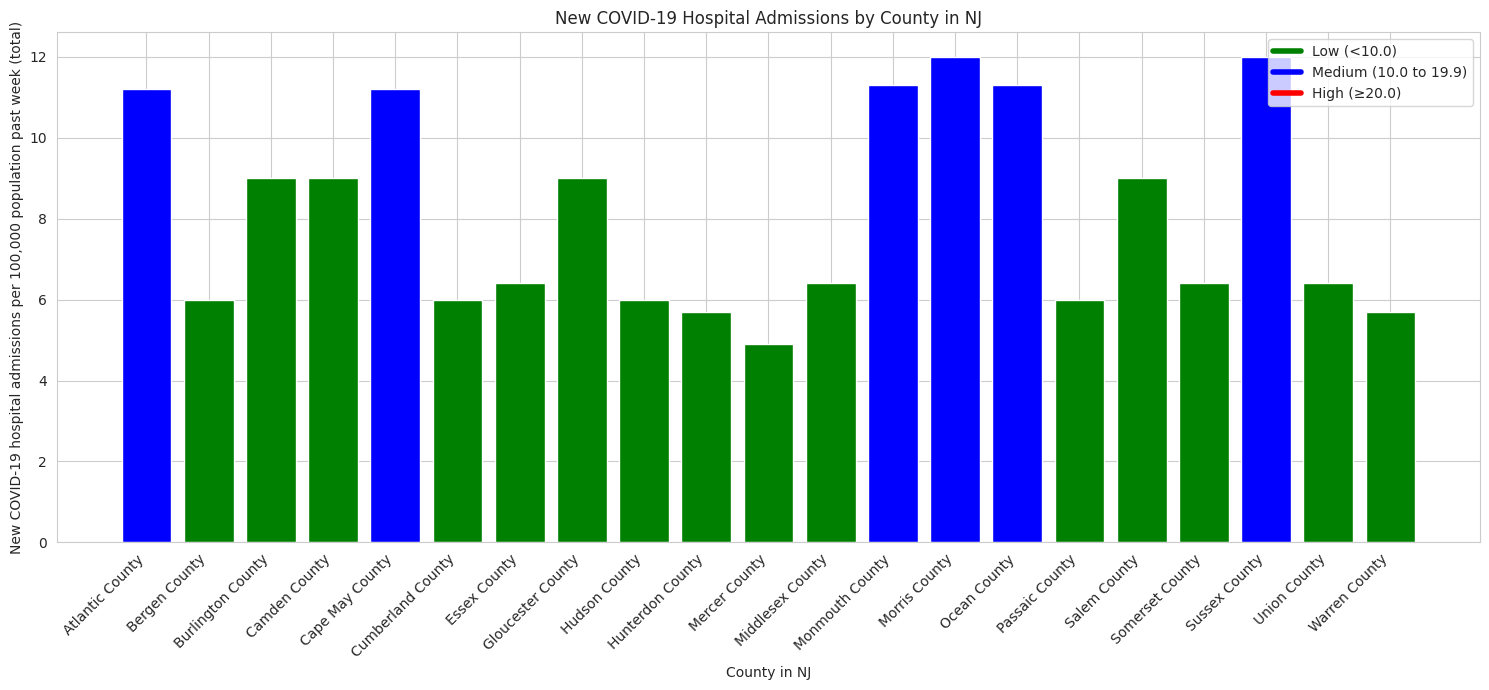

In [133]:
! wget -q -O  united_states_covid19_hospitalizations_by_county.xlsx 'https://doc.google.com/uc?export=download&id=1UFT_nizaF9cWC2BPgmnPg3-iDLikMCcZ&export=download'

hospitalizations=pd.read_excel('united_states_covid19_hospitalizations_by_county.xlsx')
hospitalizations1 = hospitalizations[['united_states_covid19_hospitalizations_by_county' ,'Unnamed: 1' ,'Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4', ]]
hospitalizations1.rename(columns={'united_states_covid19_hospitalizations_by_county': 'County'}, inplace=True)
hospitalizations1.rename(columns={'Unnamed: 1': 'State'}, inplace=True)
hospitalizations1.rename(columns={'Unnamed: 2': 'New hospital admissions of confirmed COVID-19 past week (total)'}, inplace=True)
hospitalizations1.rename(columns={'Unnamed: 3': 'New COVID-19 hospital admissions per 100000 population past week (total)'}, inplace=True)
hospitalizations1.rename(columns={'Unnamed: 4': 'COVID-19 hospital admissions level'}, inplace=True)
nj_data = hospitalizations1[hospitalizations1['State'] == 'NJ']

def get_color(value):
    if value < 10.0:
        return 'green'
    elif 10.0 <= value < 20.0:
        return 'blue'
    else:
        return 'red'

colors = nj_data['New COVID-19 hospital admissions per 100000 population past week (total)'].apply(get_color).tolist()

plt.figure(figsize=(15,7))
bars = plt.bar(nj_data['County'], nj_data['New COVID-19 hospital admissions per 100000 population past week (total)'], color=colors)

plt.ylabel('New COVID-19 hospital admissions per 100,000 population past week (total)')
plt.xlabel('County in NJ')
plt.title('New COVID-19 Hospital Admissions by County in NJ')
plt.xticks(rotation=45, ha='right')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='green', lw=4, label='Low (<10.0)'),
                   Line2D([0], [0], color='blue', lw=4, label='Medium (10.0 to 19.9)'),
                   Line2D([0], [0], color='red', lw=4, label='High (≥20.0)')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


In [134]:
njC['County Name']=njC['COUNTY_LAB']
NJconf2 = pd.merge(njC, NJconf, on='County Name',how='outer',indicator=True)

County Name  2020-04-22 _merge
0     Atlantic County         505   both
1       Bergen County       13686   both
2   Burlington County        1878   both
3       Camden County        2528   both
4     Cape May County         227   both
5   Cumberland County         382   both
6        Essex County       11387   both
7   Gloucester County         856   both
8       Hudson County       12039   both
9    Hunterdon County         434   both
10      Mercer County        2845   both
11    Monmouth County        5086   both
12       Ocean County        5234   both
13     Passaic County        9392   both
14       Salem County         134   both
15    Somerset County        2688   both
16      Sussex County         743   both
17       Union County       10484   both
18      Warren County         689   both
19      Morris County        4556   both
20   Middlesex County        9047   both

County Name  2020-04-22[1]  2020-04-22
0     Atlantic County          505.0         505
1       Bergen County        13686.0       13686
2   Burlington County         1878.0        1878
3       Camden County         2528.0        2528
4     Cape May County          227.0         227
5   Cumberland County          382.0         382
6        Essex County        11387.0       11387
7   Gloucester County          856.0         856
8       Hudson County        12039.0       12039
9    Hunterdon County          434.0         434
10      Mercer County         2845.0        2845
11    Monmouth County         5086.0        5086
12       Ocean County         5234.0        5234
13     Passaic County         9392.0        9392
14       Salem County          134.0         134
15    Somerset County         2688.0        2688
16      Sussex County          743.0         743
17       Union County        10484.0       10484
18      Warren County          689.0         689
19      Morris County         4556.0        4556
20   Middlesex County         9047.0        9047

<Axes: >

[]

[]

Text(0.5, 1.0, 'covid-19 counfirmed')

Text(0.5, 0.1, 'data from cdc')

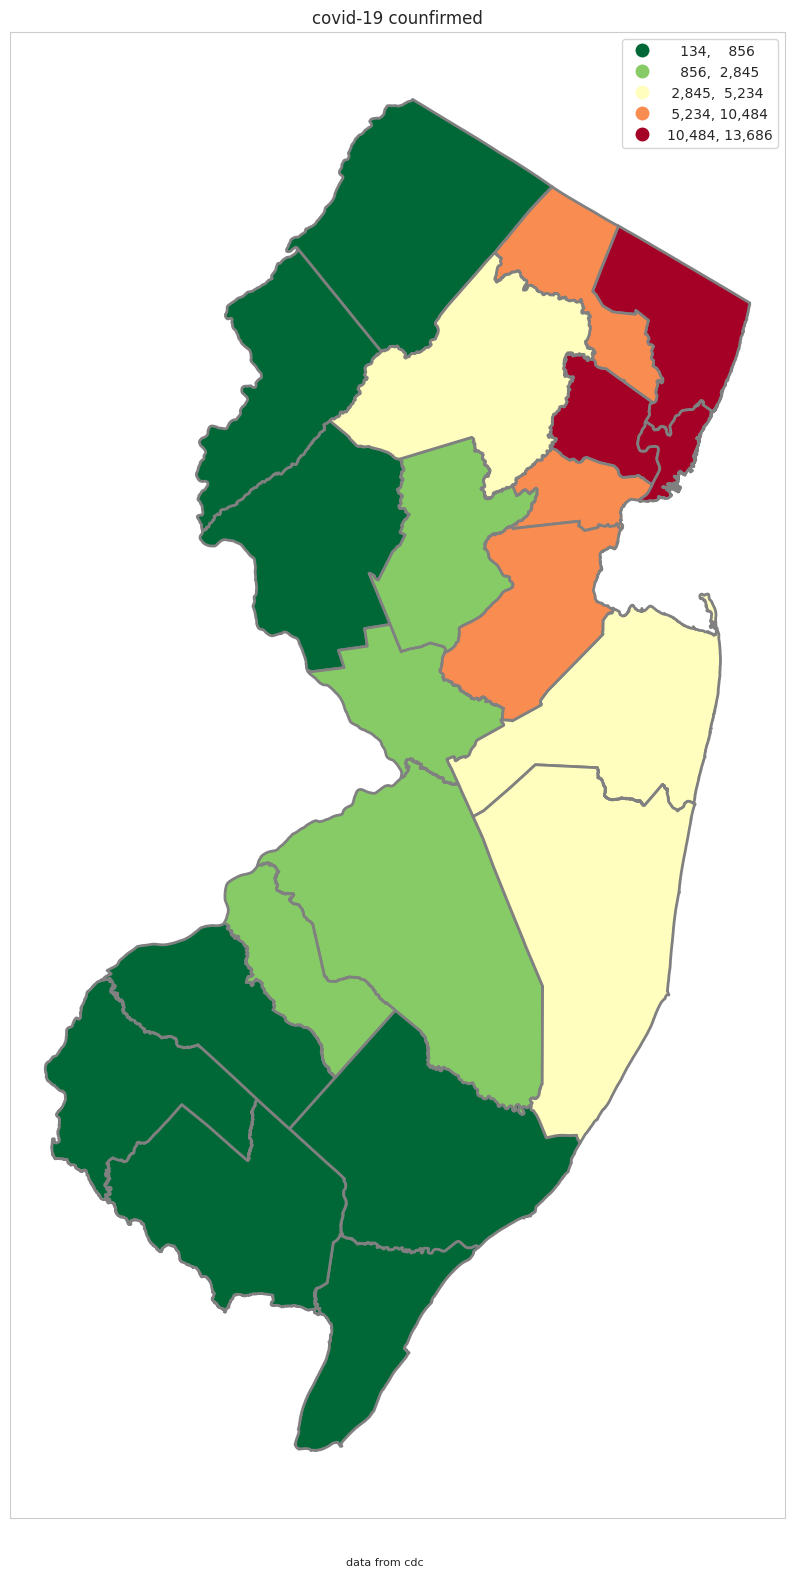

In [135]:
Jconf1=NJconf[['County Name','2020-04-22']]
NJconf3 = pd.merge(njC, NJconf, on='County Name',how='outer',indicator=True)

NJconf3[['County Name','2020-04-22','_merge']].head(50)
NJconf3['2020-04-22[1]'] = NJconf2['2020-04-22'].astype(float)
NJconf3[['County Name','2020-04-22[1]','2020-04-22']]

fig, ax = plt.subplots(figsize=(10,20))

NJconf3.plot(ax=ax,figsize=(10,20),column='2020-04-22',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('covid-19 counfirmed')
#ax.annotate('Note added to chart with minimum parameters', xy = (200000, 1000))
plt.figtext(0.5, 0.1,
            '''data from cdc''',
            ha="center", fontsize=8, #bbox={"facecolor":"white", "alpha":0.5, "pad":5}
            )

<ipython-input-136-3a4476be344d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations1['County'] = hospitalizations1['County'].str.replace(' county', '', case=False).str.upper()
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

<Axes: >

Text(0.5, 1.0, 'COVID-19 Stats by County in NJ')

[]

[]

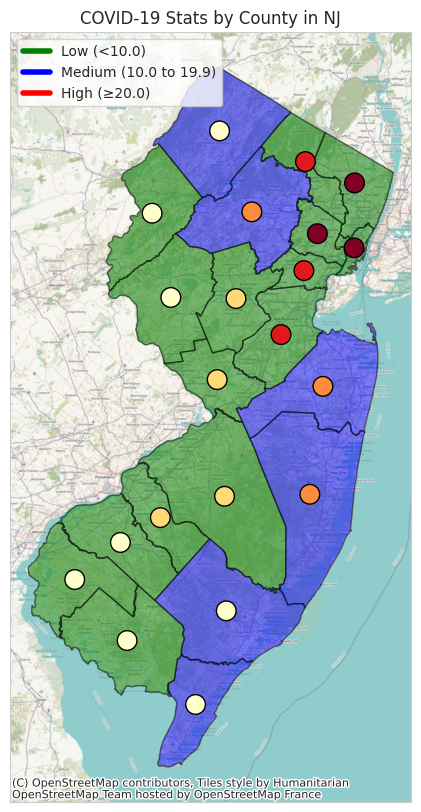

In [136]:


hospitalizations1['County'] = hospitalizations1['County'].str.replace(' county', '', case=False).str.upper()
merged = njC.set_index('COUNTY').join(hospitalizations1.set_index('County'))
merged_nj = merged[merged['State'] == 'NJ']
merged_nj.loc[:, 'colors'] = merged_nj['New COVID-19 hospital admissions per 100000 population past week (total)'].apply(get_color)


fig, ax = plt.subplots(figsize=(10, 10))
merged_nj.plot(ax=ax, edgecolor='k', facecolor=merged_nj['colors'], alpha=0.5)
cx.add_basemap(ax, zoom=10)


njP = NJconf3.copy()
njP["geometry"] = njP["geometry"].centroid
njP.plot(ax=ax, column='2020-04-22', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
         edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
         'title_fontsize':'medium', 'fontsize':'small', 'markerscale':1.4}, markersize = 200)
legend_elements = [Line2D([0], [0], color='green', lw=1, label='Low (<10.0)'),
                   Line2D([0], [0], color='blue', lw=1, label='Medium (10.0 to 19.9)')
                  ]
ax.legend(handles=legend_elements, loc='upper left')

plt.title("COVID-19 Stats by County in NJ")
ax.set_xticks([]); ax.set_yticks([])

plt.show()


<ipython-input-139-3a22ba37965c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations1['County'] = hospitalizations1['County'].str.replace(' county', '', case=False).str.upper()
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

<Axes: >

Text(0.5, 1.0, 'COVID-19 Stats by County in NJ')

[]

[]

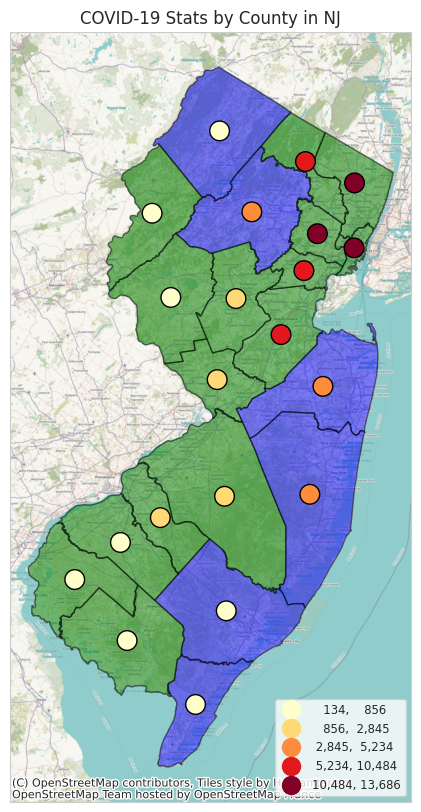

In [139]:
hospitalizations1['County'] = hospitalizations1['County'].str.replace(' county', '', case=False).str.upper()
merged = njC.set_index('COUNTY').join(hospitalizations1.set_index('County'))
merged_nj = merged[merged['State'] == 'NJ']
merged_nj.loc[:, 'colors'] = merged_nj['New COVID-19 hospital admissions per 100000 population past week (total)'].apply(get_color)


fig, ax = plt.subplots(figsize=(10, 10))
merged_nj.plot(ax=ax, edgecolor='k', facecolor=merged_nj['colors'], alpha=0.5)
cx.add_basemap(ax, zoom=10)


njP = NJconf3.copy()
njP["geometry"] = njP["geometry"].centroid
njP.plot(ax=ax, column='2020-04-22', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
         edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
         'title_fontsize':'medium', 'fontsize':'small', 'markerscale':1.4}, markersize = 200)



plt.title("COVID-19 Stats by County in NJ")
ax.set_xticks([]); ax.set_yticks([])

plt.show()